# Introduction to TensorFlow

![](images/tf_logo.png)

TensorFlow (TF) is an open-source library developed by Google for numerical computation over a **dataflow graph**. It provides a Python interface in the form of specialized functions and classes that allow for a variety of machine learning models to be built from scratch.

TF models are highly portable, allowing them to be deployed on a variety of architechtures, from multiple CPUs or GPUs on the desktop, in the cloud, or on mobile devices.

The dataflow graph allows computation to be easily parallelized. 

While TF was originally designed to tackle the training of deep neural networks, its abstractions can be useful for a variety of machine learning applications.

TensorFlow is implemented in C++, but features several APIs for high-level languages, including Python.

In 2015, Google adopted an open-source license for TF.

## A quick example

The most noticeable difference between TensorFlow and Python libraries such as NumPy is that operations in TensorFlow are symbolic. This allows TensorFlow to perform important machine learning tasks, such as automatic differentiation, but it comes at the expense of forcing us to write code that is a little more difficult to grasp.

For example, consider a simple linear algebra operation in NumPy:

In [1]:
import numpy as np

X = np.random.normal(size=[10, 3])
w = np.array([-1.5, 3.4, 0.6])
y = np.dot(X, w)

y

array([ 4.42220245,  8.33762063, -3.31688667, -1.86607942, -3.94031208,
        4.68529406, -1.70834484, -1.5742801 , -0.50007427,  2.63495862])

The corresponding implementation in TF is as follows:

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import tensorflow as tf

X = tf.random_normal([10, 3])
w = tf.constant([-1.5, 3.4, 0.6], shape=[3,1])
y = tf.matmul(X, w)

y

<tf.Tensor 'MatMul:0' shape=(10, 1) dtype=float32>

Notice that `y` is merely a matrix multiply *operation*, and not the value itself. In fact, no computation has taken place.

Evaluation takes place inside of a TensorFlow `Session` that must be created and used to execute the operation.

In [3]:
sess = tf.Session()
y_val = sess.run(y)

print(y_val)

[[ 4.7069745 ]
 [ 2.141259  ]
 [-0.02266127]
 [ 0.96325797]
 [-8.259237  ]
 [-4.0020366 ]
 [ 6.9963803 ]
 [ 2.8168092 ]
 [ 5.899995  ]
 [ 5.237709  ]]


Thus, the call to `run` fetches the value for `y`.

This illustrates the two phases of TF programs:

- **construction** phase, where a graph is specified
- **execution** phase, where operations in the graph are executed

## TensorFlow Programming Concepts

TensorFlow computation takes place over a **directed graph**, which is comprised of a set of *nodes* and associated *edges*, used to describe operations and tensors.

![](images/tf_dag.png)

### Tensors

A tensor is a generalized (i.e. multidimensional), typed array. TF tensors support a variety of tensor element types:

- signed and unsigned integers (8 to 64 bits)
- float and double precision float 
- complex numbers
- strings

Tensors are the values that "flow" through the computational graph.

A tensor's rank is its number of dimensions, while its shape is a tuple of integers specifying the array's length along each dimension. 

### Operations

An operation describes an abstract computation that consumes and produces tensors.

- **Element-wise mathematical operations**: Add, Sub, Mul, Div, Exp, Log
- **Array operations**: Concat, Slice, Split, Constant, Rank, Shape
- **Matrix operations**: MatMul, MatrixInverse
- **Stateful operations**: Variable, Assign, AssignAdd
- **Neural-net building blocks**: SoftMax, Sigmoid, ReLU, Convolution2D
- **Checkpointing operations**: Save, Restore
- **Control flow operations**: Merge, Switch, Enter, Leave, NextIteration

A **kernel** is a particular implementation of an operation that can be run on a particular type of device.

In [4]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0) # also tf.float32 implicitly
sum_ab = a + b

In [5]:
a

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

In [6]:
b

<tf.Tensor 'Const_2:0' shape=() dtype=float32>

In [7]:
sum_ab

<tf.Tensor 'add:0' shape=() dtype=float32>

## General TensorFlow Workflow

Most applications of TF to machine learning tasks proceed via the following general workflow.

1. **Import and transform data.**

    Data are often not in the correct dimension, type or scale that Tensorflow algorithms require.  Some algorithms expect normalized data, for exmaple.  Tensorflow includes functions for normalization, or alternatively, scikit-learn can be used for preprocessing.

        data = tf.nn.batch_norm_with_global_normalization(...)`

2. **Set model hyperparameters.**

    ML algorithms usually have a set of parameters that configure their execution.  For example, this can be the number of iterations, the learning rate, or other fixed parameters, as necessary.  
    
        learning_rate = 0.01
        iterations = 1000

3. **Initialize variables and placeholders.**

    Variables and placeholders for data must be specified.  Tensorflow will modify the variables during optimization, for example, to minimize a loss function. Additionally, we feed in data through placeholders, which may change from run to run, but are held constant during the execution of the algorithm. These are initialized with size and type, so that TF knows what to expect.

       a_var = tf.constant(42)
       x_input = tf.placeholder(tf.float32, [None, input_size])
       y_input = tf.placeholder(tf.fload32, [None, num_classes])

4. **Define the model structure.**

    Model specification proceeds by building a computational graph, specifically by encoding which operations must be performed on the variables and placeholders. 

        y_pred = tf.add(tf.mul(x_input, weight_matrix), b_matrix)

5. **Specify loss functions.**

    After defining the model, it can only be trained if some optimization criterion is defined. The loss function is some measure of distance between predictions and data values.  

        loss = tf.reduce_mean(tf.square(y_actual – y_pred))

6. **Initialize and train the model.**

    Now that we have everything in place, we create an instance or our graph and feed in the data through the placeholders and let Tensorflow change the variables to better predict our training data.  Here is one way to initialize the computational graph.

        with tf.Session(graph=graph) as session:
            ...
            session.run()

7. **Test the model.**

    Once the model has been trained, it should be evaluated by looking at how well it performs on new data through some specified criteria.

8. **Predict new outcomes.**

    We often wish to use the model to generate prediction from new inputs, using the trained model.

## Working with Tensors

First we start with loading TensorFlow and reseting the computational graph.

In [8]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Start a graph session
Get graph handle with the tf.Session()

In [9]:
sess = tf.Session()

### Create Tensors

TensorFlow has built in function to create tensors for use in variables.  For example, we can create a zero filled tensor of predefined shape using the `tf.zeros()` function as follows.

In [10]:
my_tensor = tf.zeros([1,20])

We can evaluate tensors with calling a `run()` method on our session.

In [11]:
sess.run(my_tensor)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

TensorFlow algorithms need to know which objects are **variables** and which are **constants**. 

We create a variable using the TensorFlow function `tf.Variable()` as follows.

In [12]:
my_var = tf.Variable(tf.zeros([1,20]))

Note that you can not run `sess.run(my_var)`, this would result in an error.  Because TensorFlow operates with computational graphs, we have to create a variable intialization operation in order to evaluate variables.  We will see more of this later on.  For this script, we can initialize one variable at a time by calling the variable method `my_var.initializer`.

In [13]:
sess.run(my_var.initializer)
sess.run(my_var)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

Variables of a specific shape can be constructed by declaring the row and column size.

In [14]:
row_dim = 2
col_dim = 3

Here are variables initialized to contain all zeros or ones.

In [15]:
zero_var = tf.Variable(tf.zeros([row_dim, col_dim]))
ones_var = tf.Variable(tf.ones([row_dim, col_dim]))

Again, we can call the initializer method on our variables and run them to evaluate thier contents.

In [16]:
sess.run(zero_var.initializer)
print(sess.run(zero_var))

[[0. 0. 0.]
 [0. 0. 0.]]


In [17]:
sess.run(ones_var.initializer)
print(sess.run(ones_var))

[[1. 1. 1.]
 [1. 1. 1.]]


### Creating Tensors Based on Other Tensor's Shape
If the shape of a tensor depends on the shape of another tensor, then we can use the TensorFlow built-in functions `ones_like()` or `zeros_like()`.

In [18]:
zero_similar = tf.Variable(tf.zeros_like(zero_var))
ones_similar = tf.Variable(tf.ones_like(ones_var))

sess.run(ones_similar.initializer)
sess.run(zero_similar.initializer)
print(sess.run(ones_similar))
print(sess.run(zero_similar))

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]


### Filling a Tensor with a Constant
Here is how we fill a tensor with a constant.

In [19]:
fill_var = tf.Variable(tf.fill([row_dim, col_dim], -1))
sess.run(fill_var.initializer)
print(sess.run(fill_var))

[[-1 -1 -1]
 [-1 -1 -1]]


We can also create a variable from an array or list of constants.

In [20]:
# Create a variable from a constant
const_var = tf.Variable(tf.constant([8, 6, 7, 5, 3, 0, 9]))
# This can also be used to fill an array:
const_fill_var = tf.Variable(tf.constant(-1, shape=[row_dim, col_dim]))

sess.run(const_var.initializer)
sess.run(const_fill_var.initializer)

print(sess.run(const_var))
print(sess.run(const_fill_var))

[8 6 7 5 3 0 9]
[[-1 -1 -1]
 [-1 -1 -1]]


### Creating Tensors Based on Sequences and Ranges
We can also create tensors from sequence generation functions in TensorFlow.  The TensorFlow function `linspace()` and `range()` operate very similar to the python/numpy equivalents.

In [21]:
# Linspace in TensorFlow
linear_var = tf.Variable(tf.linspace(start=0.0, stop=1.0, num=3)) # Generates [0.0, 0.5, 1.0] includes the end

# Range in TensorFlow
sequence_var = tf.Variable(tf.range(start=6, limit=15, delta=3)) # Generates [6, 9, 12] doesn't include the end

sess.run(linear_var.initializer)
sess.run(sequence_var.initializer)

print(sess.run(linear_var))
print(sess.run(sequence_var))

[0.  0.5 1. ]
[ 6  9 12]


### Random Number Tensors
We can also initialize tensors that come from random numbers like the following.

In [22]:
rnorm_var = tf.random_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
runif_var = tf.random_uniform([row_dim, col_dim], minval=0, maxval=4)

print(sess.run(rnorm_var))
print(sess.run(runif_var))

[[ 0.31065765 -0.33316985 -1.2880031 ]
 [-0.7111042   0.25966862 -0.34458247]]
[[3.8931956  2.3415132  3.106225  ]
 [1.7004566  0.30261374 3.5257716 ]]


## Working with Placeholders

Because of TensorFlow's lazy evaluation model, **placeholder** nodes play an important role. They don’t actually perform any computation, but simply output the data you tell them to output at runtime. They are typically used to pass the training data to TensorFlow during training. If you don’t specify a value at runtime for a placeholder, you get an exception.

First let's reset the graph session.

In [23]:
tf.reset_default_graph()

Start graph session

In [24]:
sess = tf.Session()

### Declare a placeholder

We declare a placeholder by using TensorFlow's function, `tf.placeholder()`, which accepts a data-type argument (`tf.float32`) and a shape argument, `(4,4)`.  Note that the shape can be a tuple or a list, `[4,4]`.

In [25]:
x = tf.placeholder(tf.float32, shape=(4, 4))

When the session is run, the `feed_dict` argument is used to feed in the value of x into the computational graph, via the placeholders.

In [26]:
# Input data to placeholder, note that 'rand_array' and 'x' are the same shape.
rand_array = np.random.rand(4, 4)

# Create a Tensor to perform an operation (here, y will be equal to x, a 4x4 matrix)
y = tf.identity(x)

# Print the output, feeding the value of x into the computational graph
print(sess.run(y, feed_dict={x: rand_array}))

[[0.9818235  0.12243877 0.6680755  0.2203769 ]
 [0.3279152  0.37854636 0.86278236 0.7679485 ]
 [0.55091625 0.1572678  0.30056158 0.86680937]
 [0.8177104  0.7207145  0.04612977 0.36963934]]


# Matrices and Matrix Operations

There are various ways to create matrices and manipulate them in TensorFlow

In [27]:
tf.reset_default_graph()
sess = tf.Session()

### Declaring matrices

Identity Matrix:

In [28]:
identity_matrix = tf.diag([1.0,1.0,1.0])
print(sess.run(identity_matrix))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2x3 random norm matrix:

In [29]:
A = tf.truncated_normal([2,3])
print(sess.run(A))

[[-0.49239442 -0.08395981 -0.97428805]
 [-0.04045533 -0.10461392  0.3099392 ]]


2x3 constant matrix:

In [30]:
B = tf.fill([2,3], 5.0)
print(sess.run(B))

[[5. 5. 5.]
 [5. 5. 5.]]


3x2 random uniform matrix:

In [31]:
C = tf.random_uniform([3,2])
print(sess.run(C))

[[0.757722   0.9995574 ]
 [0.50264275 0.23223782]
 [0.530267   0.9076146 ]]


Create matrix from np array:

In [32]:
D = tf.convert_to_tensor(np.array([[1., 2., 3.], 
                                   [-3., -7., -1.], 
                                   [0., 5., -2.]]))
print(sess.run(D))

[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]]


### Matrix Operations

Matrix addition/subtraction:

In [33]:
print(sess.run(A+B))

[[5.59526   5.886109  5.209255 ]
 [5.9023833 5.210756  4.0589066]]


In [34]:
print(sess.run(B-B))

[[0. 0. 0.]
 [0. 0. 0.]]


Matrix Multiplication:

In [35]:
print(sess.run(tf.matmul(B, identity_matrix)))

[[5. 5. 5.]
 [5. 5. 5.]]


Matrix Transpose:

In [36]:
print(sess.run(tf.transpose(C)))

[[0.7828226  0.37581396 0.08451748]
 [0.94853497 0.32328725 0.8005538 ]]


Matrix Determinant:

In [37]:
print(sess.run(tf.matrix_determinant(D)))

-37.99999999999999


Matrix Inverse:

In [38]:
print(sess.run(tf.matrix_inverse(D)))

[[-0.5        -0.5        -0.5       ]
 [ 0.15789474  0.05263158  0.21052632]
 [ 0.39473684  0.13157895  0.02631579]]


Cholesky Decomposition:

In [39]:
print(sess.run(tf.cholesky(identity_matrix)))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Eigenvalues and Eigenvectors:  We use `tf.self_adjoint_eig()` function, which returns two objects, first one is an array of eigenvalues, the second is a matrix of the eigenvectors.

In [40]:
eigenvalues, eigenvectors = sess.run(tf.self_adjoint_eig(D))
print(eigenvalues)

[-10.65907521  -0.22750691   2.88658212]


In [41]:
print(eigenvectors)

[[ 0.21749542  0.63250104 -0.74339638]
 [ 0.84526515  0.2587998   0.46749277]
 [-0.4880805   0.73004459  0.47834331]]


# Operations

### Arithmetic Operations
TensorFlow has multiple types of arithmetic functions.  Here we illustrate the differences between `div()`, `truediv()` and `floordiv()`.

`div()` : integer of division (similar to base python `//`

`truediv()` : will convert integer to floats.

`floordiv()` : float of `div()`

In [42]:
print(sess.run(tf.div(3,4)))
print(sess.run(tf.truediv(3,4)))
print(sess.run(tf.floordiv(3.0,4.0)))

0
0.75
0.0


Mod function:

In [43]:
print(sess.run(tf.mod(22.0,5.0)))

2.0


Cross Product:

In [44]:
print(sess.run(tf.cross([1.,0.,0.],[0.,1.,0.])))

[0. 0. 1.]


### Trigonometric functions

Sine, Cosine, and Tangent:

In [45]:
print(sess.run(tf.sin(3.1416)))
print(sess.run(tf.cos(3.1416)))
print(sess.run(tf.div(tf.sin(3.1416/4.), tf.cos(3.1416/4.))))

-7.2399803e-06
-1.0
1.0000036


### Custom operations

Custom operations can be created with Python functions:

`f(x) = 3 * x^2 - x + 10`

In [46]:
test_nums = range(15)

def custom_polynomial(x_val):
    # Return 3x^2 - x + 10
    return(tf.subtract(3 * tf.square(x_val), x_val) + 10)

print(sess.run(custom_polynomial(11)))

362


# Activation Functions

The activation operators provide different types of nonlinearities for use in neural networks. These include smooth nonlinearities (`sigmoid`, `tanh`, `elu`, `selu`, `softplus`, and `softsign`), continuous but not everywhere differentiable functions (`relu`, `relu6`, `crelu` and `relu_x`), and random regularization (dropout).

All activation ops apply componentwise, and produce a tensor of the same shape as the input tensor.

In [47]:
tf.reset_default_graph()
sess = tf.Session()

In [48]:
import matplotlib.pyplot as plt
x_vals = np.linspace(start=-10., stop=10., num=100)

### Activation Functions:

ReLU activation

In [49]:
print(sess.run(tf.nn.relu([-3., 3., 10.])))
y_relu = sess.run(tf.nn.relu(x_vals))

[-0.  3. 10.]


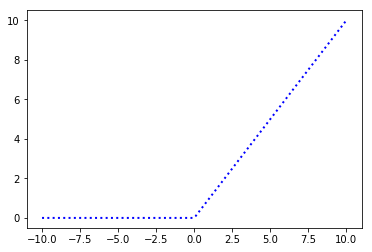

In [50]:
plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)

ReLU-6 activation

In [51]:
print(sess.run(tf.nn.relu6([-3., 3., 10.])))
y_relu6 = sess.run(tf.nn.relu6(x_vals))

[0. 3. 6.]


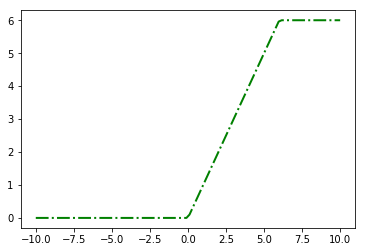

In [52]:
plt.plot(x_vals, y_relu6, 'g-.', label='ReLU6', linewidth=2)

Sigmoid activation

In [53]:
print(sess.run(tf.nn.sigmoid([-1., 0., 1.])))
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

[0.26894143 0.5        0.7310586 ]


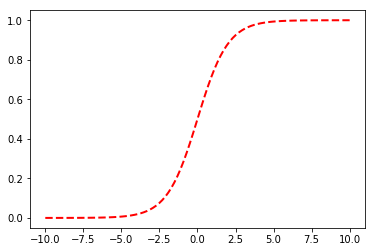

In [54]:
plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)

Hyper Tangent activation

In [55]:
print(sess.run(tf.nn.tanh([-1., 0., 1.])))
y_tanh = sess.run(tf.nn.tanh(x_vals))

[-0.7615942  0.         0.7615942]


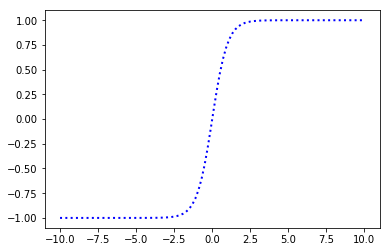

In [56]:
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)

Softsign activation

In [57]:
print(sess.run(tf.nn.softsign([-1., 0., 1.])))
y_softsign = sess.run(tf.nn.softsign(x_vals))

[-0.5  0.   0.5]


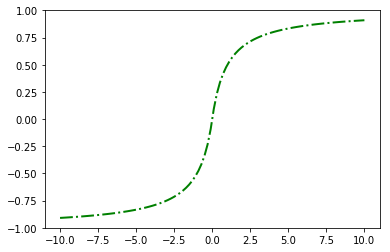

In [58]:
plt.plot(x_vals, y_softsign, 'g-.', label='Softsign', linewidth=2)

Softplus activation

In [59]:
print(sess.run(tf.nn.softplus([-1., 0., 1.])))
y_softplus = sess.run(tf.nn.softplus(x_vals))

[0.31326166 0.6931472  1.3132616 ]


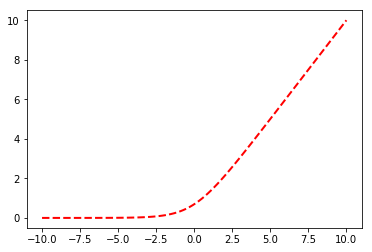

In [60]:
plt.plot(x_vals, y_softplus, 'r--', label='Softplus', linewidth=2)

Exponential linear activation

In [61]:
print(sess.run(tf.nn.elu([-1., 0., 1.])))
y_elu = sess.run(tf.nn.elu(x_vals))

[-0.63212055  0.          1.        ]


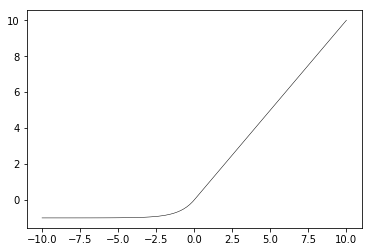

In [62]:
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)

## Feeding data to TensorFlow
<a name="data"></a>

TensorFlow is designed to work efficiently with large amount of data. So it's important not to starve your TensorFlow model in order to maximize its performance. There are various ways that you can feed your data to TensorFlow.

### Constants
The simplest approach is to embed the data in your graph as a constant:

In [63]:
import tensorflow as tf
import numpy as np

actual_data = np.random.normal(size=[100])

data = tf.constant(actual_data)

This approach can be very efficient, but it's not very flexible. One problem with this approach is that, in order to use your model with another dataset you have to rewrite the graph. Also, you have to load all of your data at once and keep it in memory which would only work with small datasets.

### Placeholders
Using placeholders solves both of these problems:

In [64]:
import tensorflow as tf
import numpy as np

data = tf.placeholder(tf.float32)

prediction = tf.square(data) + 1

actual_data = np.random.normal(size=[100])

tf.Session().run(prediction, feed_dict={data: actual_data})

array([1.4256628, 3.7084703, 1.0050759, 1.891801 , 1.000618 , 1.102875 ,
       4.308143 , 4.419981 , 2.3798094, 1.0110433, 1.5335319, 3.1696765,
       4.0508013, 1.3822668, 2.691955 , 1.2372141, 1.0288444, 1.0175235,
       5.2527614, 2.951457 , 1.8711706, 1.1256622, 1.376003 , 4.4853363,
       3.3751588, 2.942707 , 1.1711156, 1.0128106, 1.0014361, 1.0140272,
       2.496966 , 1.0557839, 1.2752887, 4.180292 , 1.1546991, 1.1019143,
       1.7111853, 1.681895 , 1.0064892, 1.2936109, 1.0022924, 2.2584827,
       1.0933796, 2.5532184, 1.6697208, 1.133412 , 5.3894787, 1.09036  ,
       4.2329793, 1.0008707, 4.452818 , 1.0593851, 1.7026651, 1.2278479,
       2.537416 , 2.17339  , 2.1007392, 1.6186216, 2.0570574, 1.3240815,
       3.9661877, 1.1686993, 1.0043651, 1.0605024, 1.0305773, 7.1562624,
       1.1635877, 3.5850189, 3.612044 , 1.2935631, 2.9315546, 1.0000032,
       9.105791 , 2.4736993, 3.707626 , 1.4024708, 1.0006132, 4.582966 ,
       1.9684144, 1.0319781, 2.696654 , 3.7027044, 

Placeholder operator returns a tensor whose value is fetched through the feed_dict argument in `Session.run` function. Note that running `Session.run` without feeding the value of data in this case will result in an error.

### Python ops
Another approach to feed the data to TensorFlow is by using Python ops:

In [65]:
def py_input_fn():
    actual_data = np.random.normal(size=[100])
    return actual_data

data = tf.py_func(py_input_fn, [], (tf.float32))

Python ops allow you to convert a regular Python function to a TensorFlow operation.

### Dataset API
The recommended way of reading the data in TensorFlow however is through the dataset API:

In [66]:
actual_data = np.random.normal(size=[100])
dataset = tf.data.Dataset.from_tensor_slices(actual_data)
data = dataset.make_one_shot_iterator().get_next()

If you need to read your data from file, it may be more efficient to write it in TFrecord format and use TFRecordDataset to read it:

```python
dataset = tf.data.TFRecordDataset(path_to_data)
```

## Control flow operations: conditionals and loops
<a name="control_flow"></a>
When building complex models such as recurrent neural networks you may need to control the flow of operations through conditionals and loops. In this section we introduce a number of commonly used control flow ops.

Let's assume you want to decide whether to multiply to or add two given tensors based on a predicate. This can be simply implemented with `tf.cond` which acts as a python `if` function:

In [67]:
a = tf.constant(1)
b = tf.constant(2)

p = tf.constant(True)

x = tf.cond(p, lambda: a + b, lambda: a * b)

print(tf.Session().run(x))

3


Since the predicate is `True` in this case, the output would be the result of the addition, which is 3.

Most of the times when using TensorFlow you are using large tensors and want to perform operations in batch. A related conditional operation is tf.where, which like tf.cond takes a predicate, but selects the output based on the condition in batch.

In [68]:
a = tf.constant([1, 1])
b = tf.constant([2, 2])

p = tf.constant([True, False])

x = tf.where(p, a + b, a * b)

print(tf.Session().run(x))

[3 2]


This will return [3, 2].

Another widely used control flow operation is `tf.while_loop`. It allows building dynamic loops in TensorFlow that operate on sequences of variable length. Let's see how we can generate Fibonacci sequence with `tf.while_loops`:

In [69]:
n = tf.constant(5)

def cond(i, a, b):
    return i < n

def body(i, a, b):
    return i + 1, b, a + b

i, a, b = tf.while_loop(cond, body, (2, 1, 1))

print(tf.Session().run(b))

5


`tf.while_loops` takes a `condition` function, and a loop `body` function, in addition to initial values for loop variables. These loop variables are then updated by multiple calls to the body function until the condition returns `False`.

Now imagine we want to keep the whole series of Fibonacci sequence. We may update our body to keep a record of the history of current values:

In [70]:
n = tf.constant(5)

def cond(i, a, b, c):
    return i < n

def body(i, a, b, c):
    return i + 1, b, a + b, tf.concat([c, [a + b]], 0)

i, a, b, c = tf.while_loop(cond, body, (2, 1, 1, tf.constant([1, 1])))

print(tf.Session().run(c))

ValueError: Input tensor 'Const_9:0' enters the loop with shape (2,), but has shape (3,) after one iteration. To allow the shape to vary across iterations, use the `shape_invariants` argument of tf.while_loop to specify a less-specific shape.

Now if you try running this, TensorFlow will complain that the shape of the the fourth loop variable is changing. So you must make that explicit that it's intentional:

In [71]:
i, a, b, c = tf.while_loop(
    cond, body, (2, 1, 1, tf.constant([1, 1])),
    shape_invariants=(tf.TensorShape([]),
                      tf.TensorShape([]),
                      tf.TensorShape([]),
                      tf.TensorShape([None])))

This is not only getting ugly, but is also somewhat inefficient. Note that we are building a lot of intermediary tensors that we don't use. TensorFlow has a better solution for this kind of growing arrays. 

Meet `tf.TensorArray`. Let's do the same thing this time with tensor arrays:

In [72]:
n = tf.constant(5)

c = tf.TensorArray(tf.int32, n)
c = c.write(0, 1)
c = c.write(1, 1)

def cond(i, a, b, c):
    return i < n

def body(i, a, b, c):
    c = c.write(i, a + b)
    return i + 1, b, a + b, c

i, a, b, c = tf.while_loop(cond, body, (2, 1, 1, c))

c = c.stack()

print(tf.Session().run(c))

[1 1 2 3 5]


TensorFlow while loops and tensor arrays are essential tools for building complex recurrent neural networks. 

---
## References

- Martín Abadi, Ashish Agarwal, Paul Barham, Eugene Brevdo,
Zhifeng Chen, Craig Citro, Greg S. Corrado, Andy Davis,
Jeffrey Dean, Matthieu Devin, Sanjay Ghemawat, Ian Goodfellow,
Andrew Harp, Geoffrey Irving, Michael Isard, Rafal Jozefowicz, Yangqing Jia,
Lukasz Kaiser, Manjunath Kudlur, Josh Levenberg, Dan Mané, Mike Schuster,
Rajat Monga, Sherry Moore, Derek Murray, Chris Olah, Jonathon Shlens,
Benoit Steiner, Ilya Sutskever, Kunal Talwar, Paul Tucker,
Vincent Vanhoucke, Vijay Vasudevan, Fernanda Viégas,
Oriol Vinyals, Pete Warden, Martin Wattenberg, Martin Wicke,
Yuan Yu, and Xiaoqiang Zheng.
TensorFlow: Large-scale machine learning on heterogeneous systems, 2015. Software available from tensorflow.org.